Trying to figure out the displacement field of Paco's simulations

In [1]:
import numpy as np 
# --- mnucosmomap ---
from mnucosmomap import catalogs as Cats

ImportError: No module named mnucosmomap

Import initial conditions of realization 1 

In [2]:
IC = Cats.mNuICs(1)

In [3]:
x = IC['Position'][:,0]
y = IC['Position'][:,1]
z = IC['Position'][:,2]

In [4]:
Npart = len(IC['ID'])
print('Nparticle = %i' % Npart)

Nparticle = 134217728


In [5]:
print('%f < x < %f' % (x.min(), x.max()))
print('%f < y < %f' % (y.min(), y.max()))
print('%f < z < %f' % (z.min(), z.max()))

0.000000 < x < 1000.000000
0.000001 < y < 1000.000000
0.000000 < z < 1000.000000


In [6]:
print Npart**(1./3.) 

512.0


Find all the particles in $(10\,\mathrm{Mpc})^3$ subbox

In [19]:
i_x, i_y, i_z = 7, 6, 0

In [20]:
L_subbox = 1000./8.
L_halfres = 0.5 * 1000./512.
xmin, xmax = L_subbox * float(i_x) + L_halfres, ((L_subbox * float(i_x+1) + L_halfres) % 1000.)
ymin, ymax = L_subbox * float(i_y) + L_halfres, L_subbox * float(i_y+1) + L_halfres
zmin, zmax = L_subbox * float(i_z) + L_halfres, L_subbox * float(i_z+1) + L_halfres
if xmax < xmin: 
    xlim = ((x >= xmin) | (x < xmax))
else: 
    xlim = ((x >= xmin) & (x < xmax))
ylim = ((y >= ymin) & (y < ymax))
zlim = ((z >= zmin) & (z < zmax))

In [21]:
print xmin, xmax

875.9765625 0.9765625


In [22]:
print xmin - i_x * (1000./8.), (xmax - i_x * (1000./8.)) % 1000.

0.9765625 125.9765625


In [19]:
insubbox = (xlim & ylim & zlim)
print('%i particles in subox' % np.sum(insubbox))
print('%i particles SHOULD be in the subbox' % (Npart/(8**3)))

262144 particles in subox
262144 particles SHOULD be in the subbox


(-1.0, 18.0)

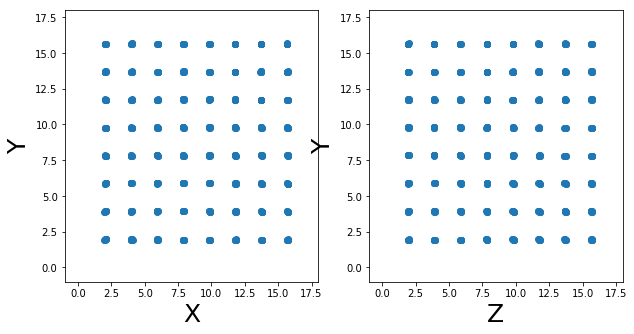

In [59]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(121)
sub.scatter(x[insubbox], y[insubbox])
#sub.scatter(x[near_subbox], y[near_subbox] - 1000.)
sub.set_xlabel('X', fontsize=25)
sub.set_xlim([-1., 18.])
sub.set_ylabel('Y', fontsize=25)
sub.set_ylim([-1., 18.])

sub = fig.add_subplot(122)
sub.scatter(z[insubbox], y[insubbox])
#sub.scatter(z[near_subbox], y[near_subbox] - 1000.)
sub.set_xlabel('Z', fontsize=25)
sub.set_xlim([-1., 18.])
sub.set_ylabel('Y', fontsize=25)
sub.set_ylim([-1., 18.])

In [56]:
for i_x in range(8): 
    for i_y in range(8): 
        for i_z in range(8): 
            insubbox = (
                (x > i_x * (1000./64.) + 1.) & (x < (i_x+1) * (1000./64.) + 1.) & 
                (y > i_y * (1000./64.) + 1.) & (y < (i_y+1) * (1000./64.) + 1.) &
                (z > i_z * (1000./64.) + 1.) & (z < (i_z+1) * (1000./64.) + 1.))
            if np.sum(insubbox) != 512: 
                print('%i particles in subox' % np.sum(insubbox))
                print('%i, %i, %i' % (i_x, i_y, i_z))

In [60]:
parts = Cats.mNuParticles(0.0, 1, 2)

In [64]:
i_ic_sorted = np.argsort(IC['ID'])
i_part_sorted = np.argsort(parts['ID'])

In [65]:
print IC['ID'][i_ic_sorted]
print parts['ID'][i_part_sorted]

[        1         2         3 ... 134217726 134217727 134217728]
[        1         2         3 ... 134217726 134217727 134217728]


In [66]:
print np.array_equal(IC['ID'][i_ic_sorted], parts['ID'][i_part_sorted])

True


In [67]:
print np.array_equal(IC['ID'][i_ic_sorted], np.arange(1, Npart+1))

True


In [ ]:
firstten = [] 
for i in range(1,11): 
    firstten.append(np.arange(Npart)[box['ID']==i][0])
    
nextten = [] 
for i in range(512,523): 
    nextten.append(np.arange(Npart)[box['ID']==i][0])

In [ ]:
fig = plt.figure()
sub = fig.add_subplot(121)
sub.scatter(x[firstten], y[firstten])
sub.scatter(x[nextten], y[nextten])
sub.set_xlim([0., 1000.])
sub.set_ylim([0., 1000.])
sub = fig.add_subplot(122)
sub.scatter(x[firstten], z[firstten])
sub.scatter(x[nextten], z[nextten])
sub.set_xlim([0., 1000.])
sub.set_ylim([0., 1000.])

In [ ]:
print x[firstten]
print y[firstten]
print z[firstten]

In [ ]:
print x[nextten]
print y[nextten]
print z[nextten]